# Daniele Mellino - 2013373

In [1]:
library(latex2exp)

## Exercise 1
The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t=10s$) follows a Poisson distribution on the parameter μ.  The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3 .

1. suppose a uniform prior distribution for the parameter μ.
    - determine and draw the posterior distribution for μ, given the data
    - evaluate mean, median and variance, both analytically and numerically in R


2. suppose a Jeffrey’s prior for the parameter μ.
    - determine and draw the posterior distribution for μ, given the data
    - evaluate mean, median and variance, both analytically and numerically in R
  
  
3. evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.

#### solution :

We have a Poisson process, so the likelihood of a single measurement is :

$lik_i(x_i|\mu) = \dfrac{\mu^{x_i} e^{-\mu}}{x_i!}$

Supposing indipendent measurement, the likelihood for all of them is simply the product:

$lik_n(\vec{x}|\mu)=\prod^n_{i=1} lik_i(x_i|\mu)= \frac{\mu^{\sum x_i} e^{-n\mu}}{Z}  $

Where the Z is a normalization factor. 
Now, the posterior is obtained multiplying the likelihood for the prior.
The Jeffreys prior in this scenario is : 

$g_J(\mu)= \mu^{-\frac{1}{2} }  $

Remembering the form of the gamma distribution, the posterior in case 1. and 2. happens to be a gamma distribution with parameters respectively :

1. $\alpha_u = \sum x_i +1 $ and $\beta_u= n $ 
2. $\alpha_J = \sum x_i +\frac{1}{2} $ and $\beta_J= n  $

Given that the mean and the variance of a gamma function are:

$E[\mu]= \frac{\alpha}{\beta}$ and  $var = \frac{\alpha}{\beta^2}$ 

In [1]:
#basic variables:
N= 10000 #simulation dimension
x= seq(0.001, 6, length.out=N)
data<- c(4, 1, 3, 1 ,3)

#### 1. suppose a uniform prior distribution for the parameter μ.

[1] 10000
Assuming a uniform prior:

The analytical results are:
 mean= 2.6 
 variance= 0.52 
The numerical results are:
 mean= 2.586002 
 median= 2.524797 
 variance= 0.497876

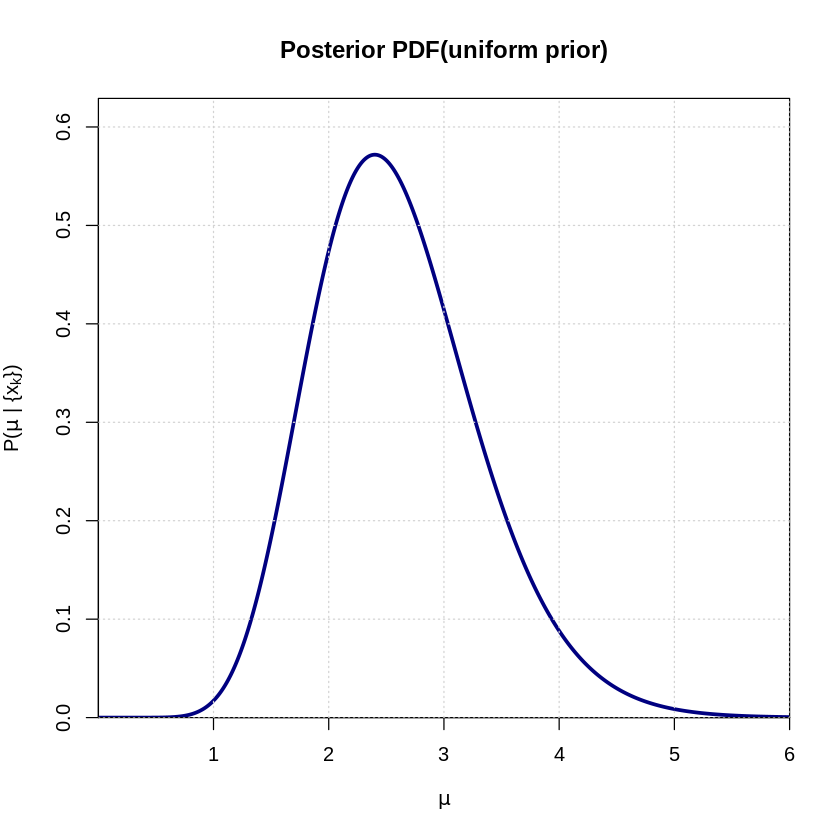

In [2]:
#uniform case :
alpha_u<- sum(data)+1
beta_u <- length(data)

# analytic values :
mean_a_u<- alpha_u/beta_u
variance_a_u<- alpha_u/ (beta_u * beta_u ) 

# sample posterior
posterior_r<- rgamma(N, alpha_u, beta_u)

#numerics : 
mean_n_u<- mean(posterior_r)
median_n_u<- median(posterior_r)
variance_n_u <-var(posterior_r)


#plot posterior
options(repr.plot.width=7, repr.plot.height=7)

posterior_u<-dgamma(x,alpha_u,beta_u)
print(length(x))
plot(x, posterior_u, 
     xaxs='i', yaxs='i',
     col='navy', type='l',
     lty=1, lwd = 3, 
     ylim=c(0,1.1*max(posterior_u)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")),
     main='Posterior PDF(uniform prior)')
grid()


cat("Assuming a uniform prior:\n\nThe analytical results are:\n mean=",mean_a_u,
    "\n variance=",variance_a_u,
    "\nThe numerical results are:\n mean=",mean_n_u,
    "\n median=",median_n_u,"\n variance=",variance_n_u)

#### 2. suppose a Jeffrey's prior distribution for the parameter μ.

[1] 10000
Assuming a Jeffrey's prior:

The analytical results are:
 mean= 2.5 
 variance= 0.5 
The numerical results are:
 mean= 2.504167 
 median= 2.433142 
 variance= 0.5008608

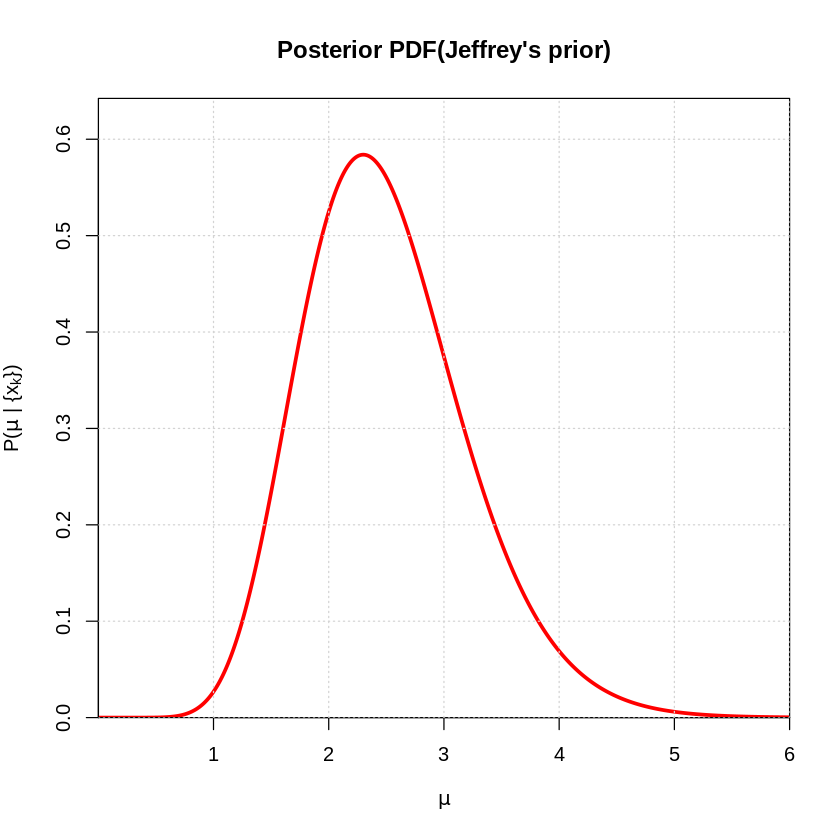

In [7]:
alpha_j<- sum(data)+0.5
beta_j <- length(data)

# analytic values :
mean_a_j<- alpha_j/beta_j
variance_a_j<- alpha_j/ (beta_j * beta_j ) 

# sample posterior
posterior_r<- rgamma(N, alpha_j, beta_j)

#numerics : 
mean_n_j<- mean(posterior_r)
median_n_j<- median(posterior_r)
variance_n_j <-var(posterior_r)


#plot posterior
options(repr.plot.width=7, repr.plot.height=7)

posterior_j<-dgamma(x,alpha_j,beta_j)
print(length(x))
plot(x, posterior_j, 
     xaxs='i', yaxs='i',
     col='red', type='l',
     lty=1, lwd = 3, 
     ylim=c(0,1.1*max(posterior_j)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")),
     main="Posterior PDF(Jeffrey's prior)")
grid()


cat("Assuming a Jeffrey's prior:\n\nThe analytical results are:\n mean=",mean_a_j,
    "\n variance=",variance_a_j,
    "\nThe numerical results are:\n mean=",mean_n_j,
    "\n median=",median_n_j,"\n variance=",variance_n_j)

In [16]:
library(bayestestR)
ciJ_eti<-ci(rgamma(10000,alpha_j,beta_j),method="ETI")
cif_eti<-ci(rgamma(10000,alpha_u,beta_u),method="ETI")
print(ciJ_eti)
cat("\n")
print(cif_eti)


95% ETI: [1.31, 4.06]
95% ETI: [1.38, 4.19]

#### 3. evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.

In [5]:
# I use the functions used in the previous set of exercises

CL_linear<- function(x,post, ci=0.95){
    d<-post * (x[2]-x[1])
    conf<-(1-ci)/2 #double tail
    
    for(i in 1:(length(d)-1)){
        #left tail
        if( sum(d[1:i])<conf & sum(d[1:(i+1)])>conf ){
            #interp coeff
            m<- (sum(d[1:(i+1)])-sum(d[1:i]) )/(x[i+1]-x[i])
            q<- sum(d[i:1])
            #left bound:
            a<- (conf-q)/m+x[i] 
        
        }
        
        #right tail
        if(sum(d[1:i])<(ci+conf) & sum(d[1:(i+1)])>(ci+conf)) {
            #interp coeff
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            #right bount
            b <- (1-conf-q)/m+x[i]
        }
        
    }
    
    return(c(a,b))
    
}


#function that plot a posterior with the confidence interval
plot_CI<-function(p,post,cmm,max,name,cmg=NULL,g=FALSE,col=c("red","black","green") ){    
    plot(p, post,
         xaxs='r', yaxs='i',
         col=col[1], type='l',
         ylim=c(0,max(post)+1),
         main = name,
         lwd = 3, cex.lab=1.5,cex.main=2,
         xlab="p", ylab='Density')

    x <- c(cmm[1],p[p>cmm[1] & p<cmm[2]],cmm[2])
    y <- c(0,post[which(p>cmm[1] & p<cmm[2])],0)
    polygon(x = x, y = y, col = adjustcolor(col[1],alpha.f=0.6)  )
    
    if(g){
    xg <- c(cmg[1],p[p>cmg[1] & p<cmg[2]],cmg[2])
    yg <- c(0,post[which(p>cmg[1] & p<cmg[2])],0)
    polygon(x = xg, y = yg, col = adjustcolor(col[3],alpha.f=0.4)  )
    legend("right",legend=c("C.I. posterior","C.I gaussian"),
           col=c(adjustcolor(col[1],alpha.f=0.6),adjustcolor(col[3],alpha.f=0.4 ) ),
                 lty=1,lwd=3)
    }
    

    abline(v=max, lty=2,col=col[1])
    abline(v=cmm[1], lty=2,col=col[1])
    abline(v=cmm[2], lty=2,col=col[1])


    text(max, par("usr")[1] + 0.8, labels = TeX(sprintf("$MAX$= %0.3f",max)), pos=1, cex=1.5, col=col[2], xpd=TRUE)
    text(cmm[1], par("usr")[4] , labels = TeX(sprintf("$a$= %0.3f",cmm[1])), pos=1, cex=1.5, col=col[2], xpd=TRUE)
    text(cmm[2], par("usr")[4] , labels = TeX(sprintf("$b$= %0.3f",cmm[2])), pos=1, cex=1.5, col=col[2], xpd=TRUE)

    grid()
    
    
}



In [6]:
#compute 95% credibility intervals:
cl_u<-CL_linear(x, posterior_u)
cl_j<-CL_linear(x, posterior_j)

cat("(flat) 95% C.I is : [", round(cl_u[1],3), ", ", round(cl_u[2],3), "]", "\n", sep="")
cat("(Jeffrey's) 95% C.I. is: [", round(cl_j[1],3), ", ", round(cl_j[2],3), "]",       sep="")

#normal distribution with same mean and variance
#here in order to compare the C.I, I use the same function to compute them,
# even if for a normal distribution there are simplest ways

normal_u<- dnorm(x,mean=mean_a_u,sd=sqrt(variance_a_u))
normal_j<- dnorm(x,mean=mean_a_j,sd=sqrt(variance_a_j))

cl_nu<-CL_linear(x, normal_u)
cl_nj<-CL_linear(x, normal_j)

cat("\n(gaussian-flat) 95% C.I is : [", round(cl_nu[1],3), ", ", round(cl_nu[2],3), "]", "\n", sep="")
cat("(gaussian-Jeffrey's) 95% C.I. is: [", round(cl_nj[1],3), ", ", round(cl_nj[2],3), "]",       sep="")



(flat) 95% C.I is : [1.384, 4.192]
(Jeffrey's) 95% C.I. is: [1.312, 4.064]
(gaussian-flat) 95% C.I is : [1.188, 4.015]
(gaussian-Jeffrey's) 95% C.I. is: [1.116, 3.888]

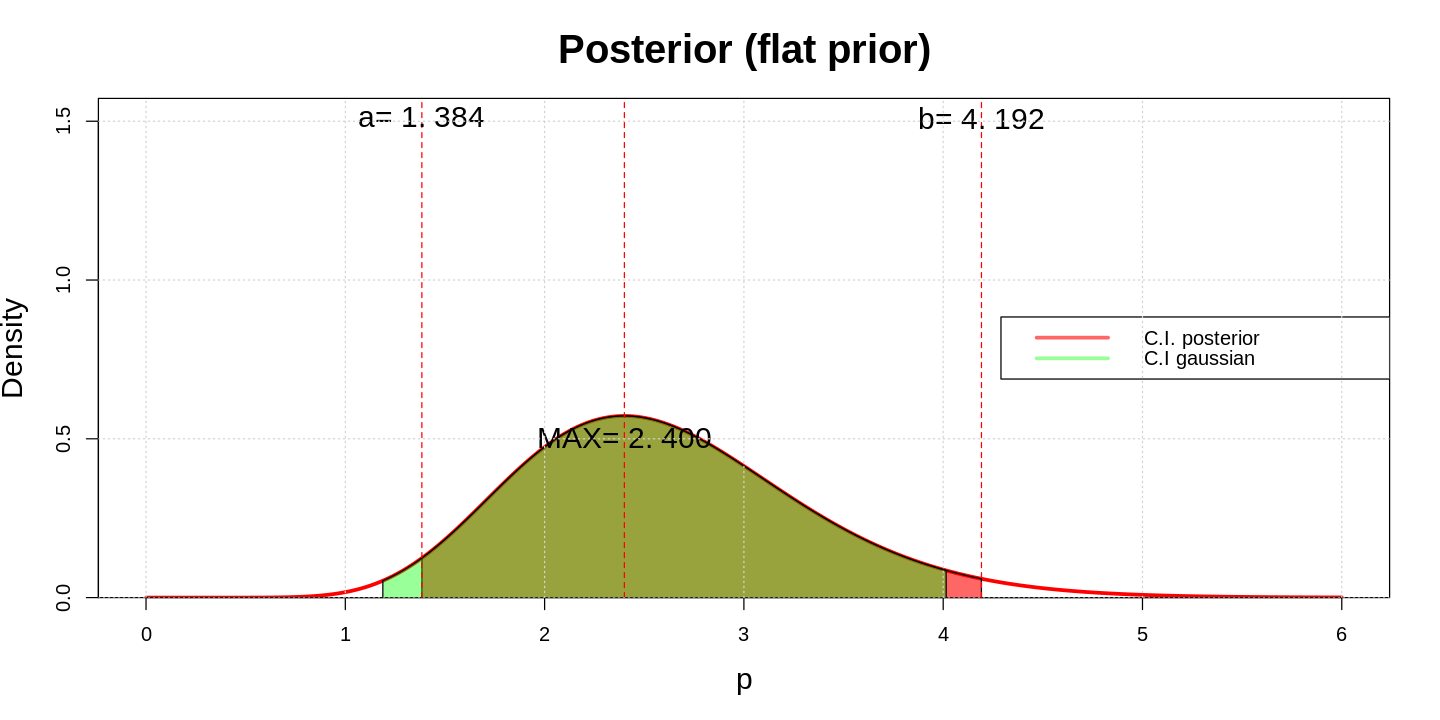

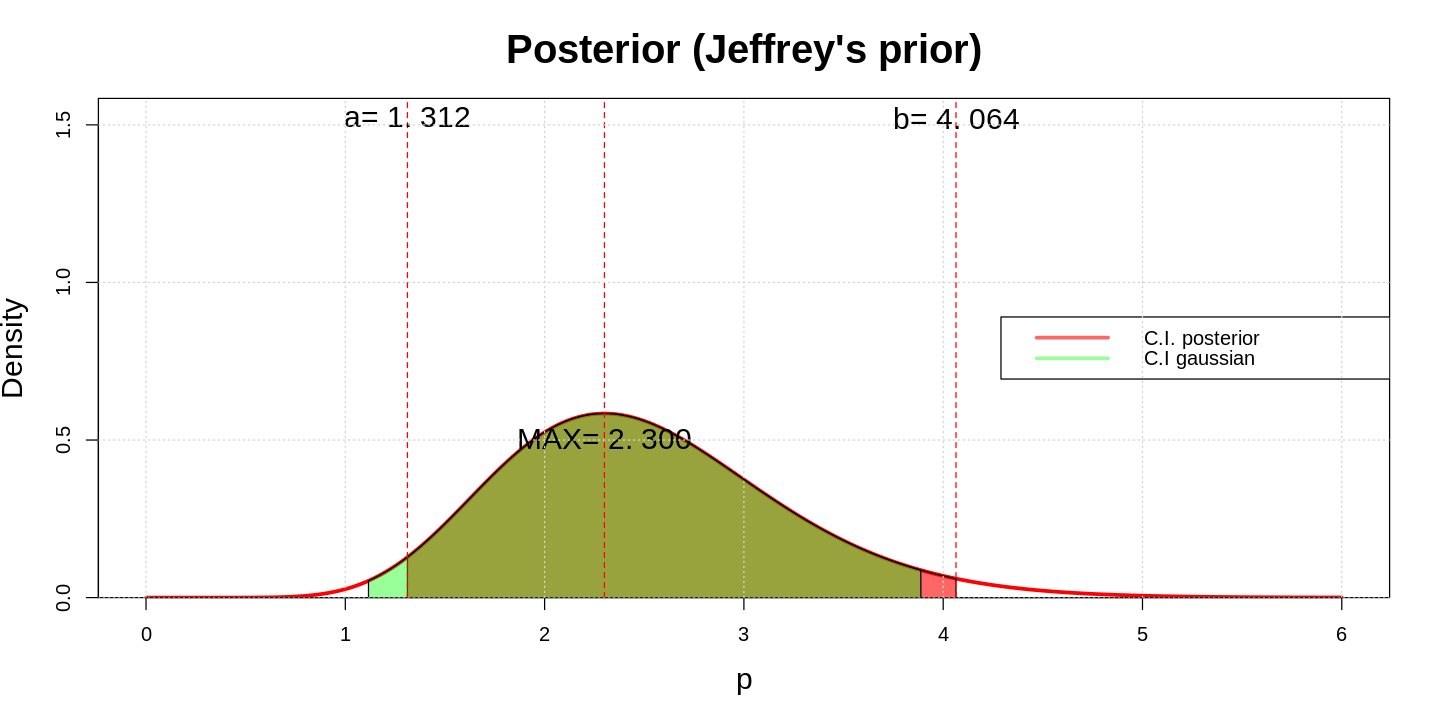

In [7]:
#plots

#get max
max_u<- x[which.max(posterior_u)]
max_j<- x[which.max(posterior_j)]

options(repr.plot.width=12,repr.plot.height=6)
plot_CI(x,posterior_u,cl_u,max_u,"Posterior (flat prior)",cl_nu,g=TRUE)
plot_CI(x,posterior_j,cl_j,max_j,"Posterior (Jeffrey's prior)",cl_nj,g=TRUE)



## Exercise 2

Given the problem of the lightouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown

* write a small R program to evaluate the posterior distribution as a function of the collected data
* assume $\beta=1$ km, $\alpha_{TRUE}=1$ km and sample data in the range x∈[−2 km,+2 km]
* plot the posterior as a function of the number of collected data(assume n={1,2,5,10,20,50,100})

##### solution :
In the lecture we already computed the likelihood, that remain the same. The prior, for our case change. Let's reasonably assume that $\alpha$ and $\beta$ are indipendent so : 

$$p(\alpha, \beta|M) \propto p(\alpha|M)\: p(\beta|M)  $$

For both we use a uniform prior.
So the posterior becomes: 

$$p(\alpha, \beta|\{x_k\},M) \propto p(\{x_k\}|\alpha, \beta,M)\: p(\alpha, \beta|M)$$

For semplicity we consider also the measurements indipendents.

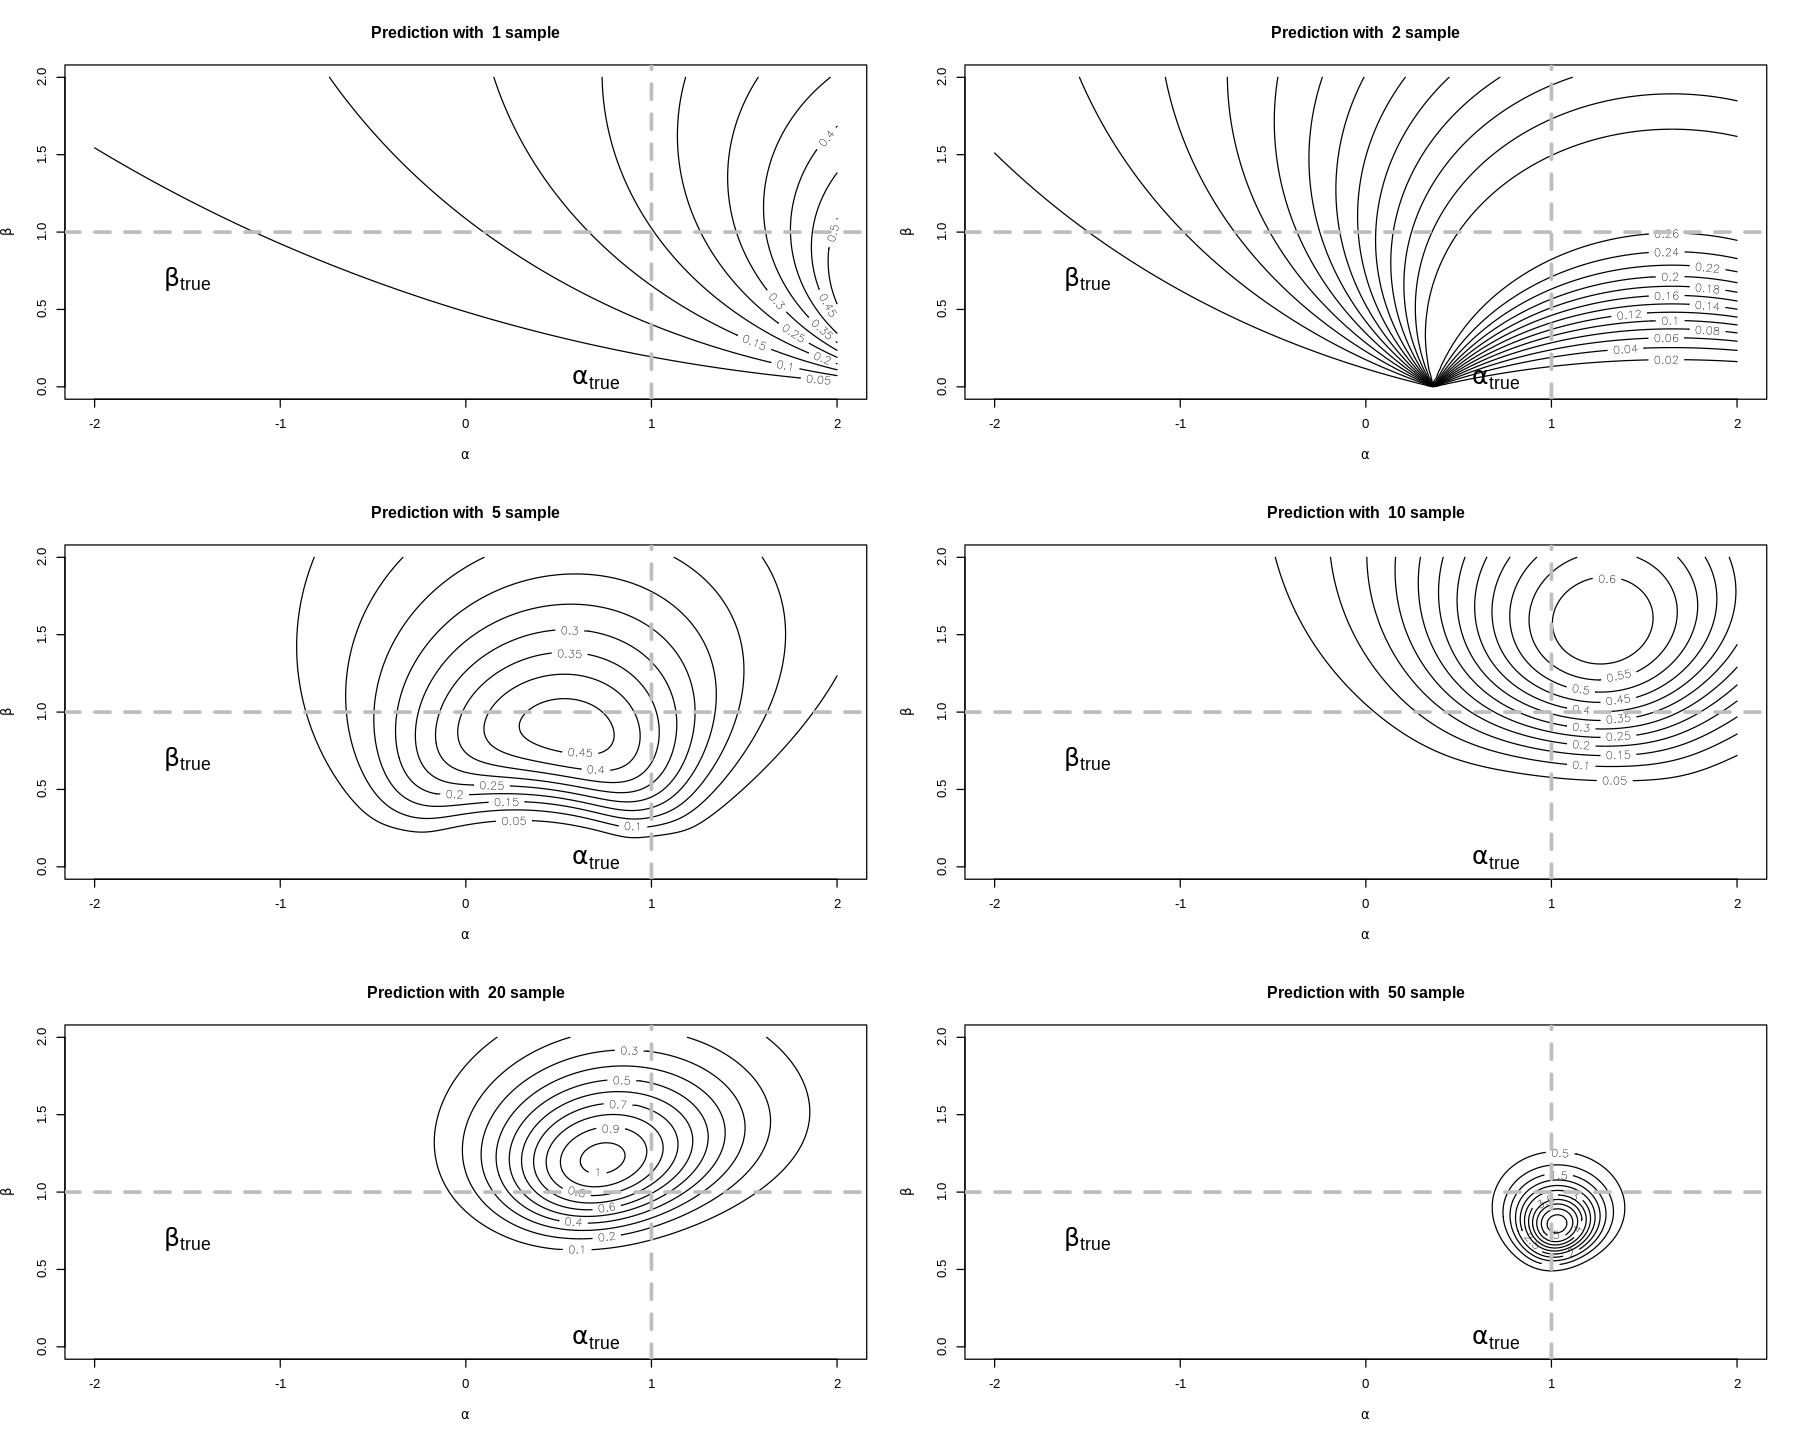

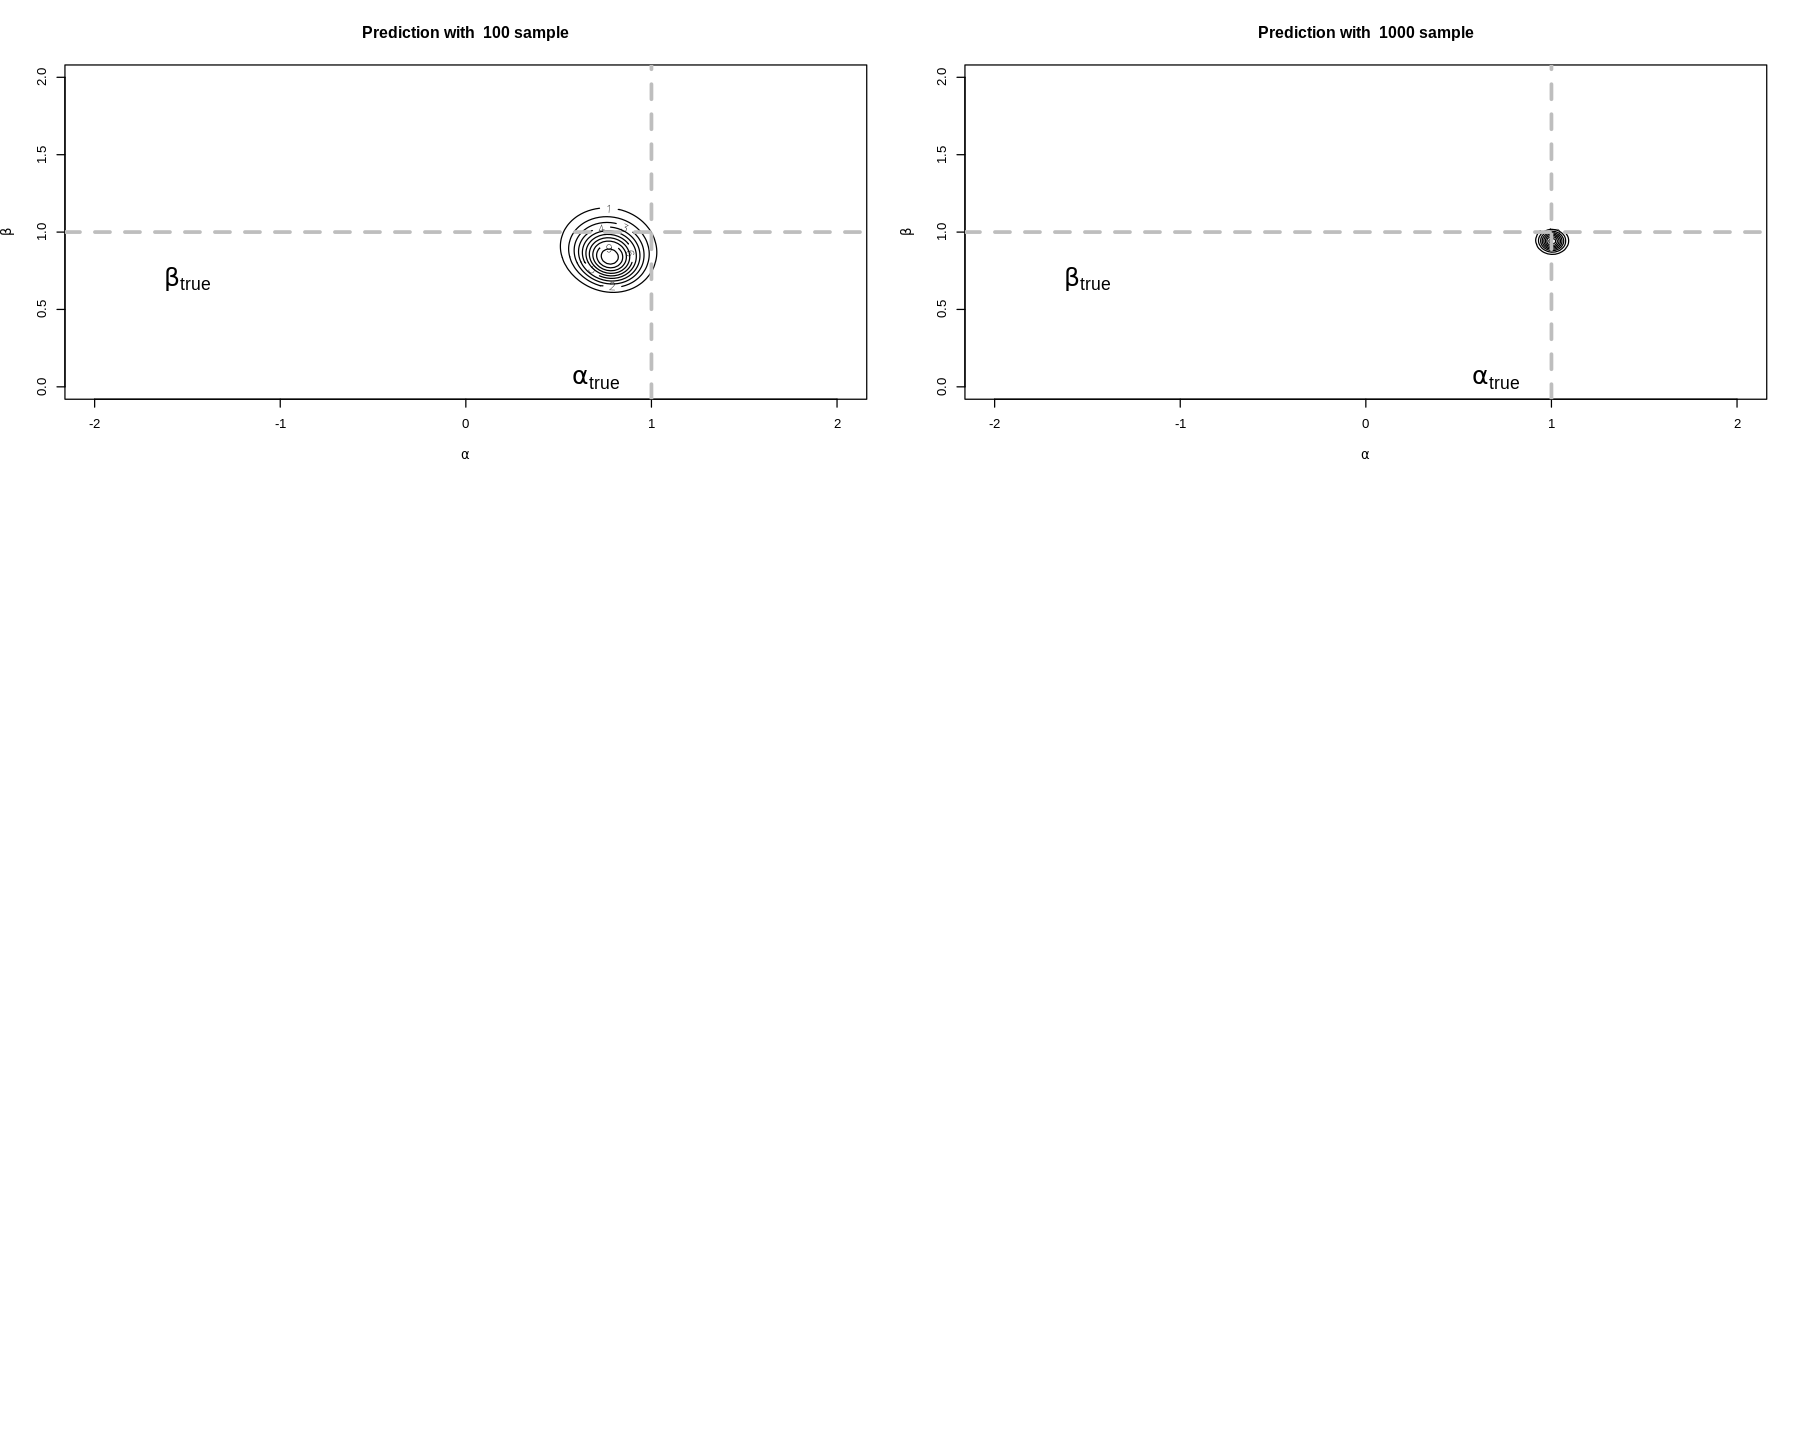

In [22]:
#sample parameters
x.min <- -2; x.max <- +2; n.sample<-200
ha <- (x.max - x.min)/n.sample
alpha <- seq(from=x.min, by=ha, length.out=n.sample+1)
beta<- seq(0,2,length.out=n.sample)
hb<- beta[2]-beta[1]
h<-ha*hb

#function that compute the log posterior:
log.prior <- function(alpha, beta) {
    logPrior <- log(dunif(alpha, min=x.min, max=x.max)) + log(dunif(beta, min=0, max=2))
    
    return(logPrior)
}

log.like <- function(data, alpha, beta) {
    logL <- rep(0, length(alpha))
    for (x in data) {
        logL <- logL + log( (beta/pi) / (beta^2 + (x - alpha)^2) )
    }
    
    return(logL)}

p.log.post <- function(alpha, beta, xk) {
    logPost <- log.like(xk, alpha, beta) + log.prior(alpha, beta)
    
    return(logPost)}


#parameter
#I add also 1000 to see if it converges
n_l <- c(1,2, 5, 10, 20, 50, 100,1000) #number of measuraments
#true values
a_true<-1
b_true<-1



#plot setting
options(repr.plot.width=15,repr.plot.height=12)
par(mfrow=c(3,2))   

#cycle over different measurement
for (n in n_l) {
    #generates angles and then the positions
    theta <- runif(n,-pi/2,pi/2) 
    x_k <- b_true * tan(theta) + a_true
    
    log.post<-outer(alpha, beta,
                    Vectorize(function(alpha,beta) p.log.post(alpha,beta,x_k)) )
    log.post<-log.post- max(log.post)
                              
    post<- exp(log.post) / (h * sum(exp(log.post)))
    
    #contour plots
    contour(alpha, beta, post, 
            xlab=expression(alpha), ylab=expression(beta),
            main=paste("Prediction with ",n, "sample"))
    abline (v=a_true,h=b_true,col="grey", lty=2, lwd=3)
    text(-1.5, 0.7, expression(paste(beta[true])), cex=1.9)
    text(0.7, 0.05, expression(paste(alpha[true])), cex=1.9)

    
}

## Exercise 3
Given the Signal over Background example discussed last week, analyze and discuss the following cases:

1. vary the sampling resolution of used to generate the data, keeping the same sampling range
    - xdat <- seq(from=-7*w, to=7*w, by=0.5*w) 
    - change the resolution w={0.1,0.25,1,2,3}
    - check the effect on the results
    
    
2. change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
    - check the effect on the results

In [85]:
#function for computing the signal
signal <- function(x, a, b, x0, w, t) {
  t*(a* exp(-(x-x0)^2/(2*w^2)) + b)
}

#function for computing the log posterior
log.post <- function(d, x, a, b, x0, w, t) {
    # the effect of the prior
  if(a<0 || b <0){ return(-Inf)}
  sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE)) 
}

#I build a function that do all the analysis with A,B and w in input

Analysis<- function(w_sr=1,A.true=2,B.true=1){
    
    #set seed
    set.seed(2045)
    
    # - Sampling grid for computing posterior
    alim   <- c(0.0, A.true*2 ) #it change when A_true is different
    blim   <- c(0.5, B.true*3/2) #same for B_true
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim)/Nsamp
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid
    b <- blim[1] + diff(blim)*uniGrid
    
    # - Generate the observed data
    
    x0<-0 #signal peak
    Delta.t <- 5 # exposure time
    w<-1
    #Change the resolution through w_sr
    xdat   <- seq(from=-7*w, to=7*w, by=w_sr*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t)
    ddat   <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    
    for(j in 1:length(a)) {
      for(k in 1:length(b)) {
        z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
      }
    }

    z <- z - max(z) # set maximum to zero
    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter. Normalize by gridding
    
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
  
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters. Vectorize(func, par)
    # makes a vectorized function out of func in the parameter par.
    
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    #plots setting
    
    options(repr.plot.width=16,repr.plot.height=4)
    par(mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(4,4,3,2), 
        oma=0.1*c(1,1,1,1), cex.lab=1.5, cex.main=1.5)
    
    # Signal + background
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    
    plot(xplot, splot, ylim=range(c(splot, ddat)), 
         xlab="x", ylab="Signal+Background counts", 
         main=paste("W_sr=",w_sr, "   A/B =", A.true/B.true),
         type="l", col="grey", lwd=2)
    
    xdat.off<-xdat-w_sr*0.25
    lines(xdat.off , ddat , type='s',col='firebrick3',
         lwd=2,xlim=range ( xplot),
         ylim= range (c(splot , ddat )))
    
    # Contour plot A-B
    contour(a, b, exp(z), nlevels=5, 
            labcex=0.5, lwd=2, xlab="amplitude, A",  
            main=paste("W_sr=",w_sr, "   A/B =", A.true/B.true),
            ylab="background, B")
    
    abline(v=A.true,h=B.true,
           col="grey", lty='dotted', lwd=2)
    
    # Marginalization B
    plot(b, p_b_D, 
         xlab="background, B", yaxs="i", 
         main=paste("W_sr=",w_sr, "   A/B =", A.true/B.true),
         ylim=1.05*c(0,max(p_b_D, p_b_aD)), 
         ylab="P(B | D)  and  P(B | A,D)", 
         type="l", lwd=2 )
    
    lines(b, p_b_aD, lwd=2, lty=2)
    
    abline(v=B.true, col="black", lty='dotted', lwd=2)
    
    # Marginalization A 
    plot(a, p_a_D, xlab="amplitude, A", 
         yaxs="i", 
         main=paste("W_sr=",w_sr, "   A/B =", A.true/B.true),
         ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)", 
         type="l", lwd=2)
    
    lines(a, p_a_bD, lwd=2, lty=2)
    
    abline(v=A.true, col="black", lty='dotted', lwd=2)
}

#### 1. Vary the sampling resolution of used to generate the data, keeping the same sampling range 

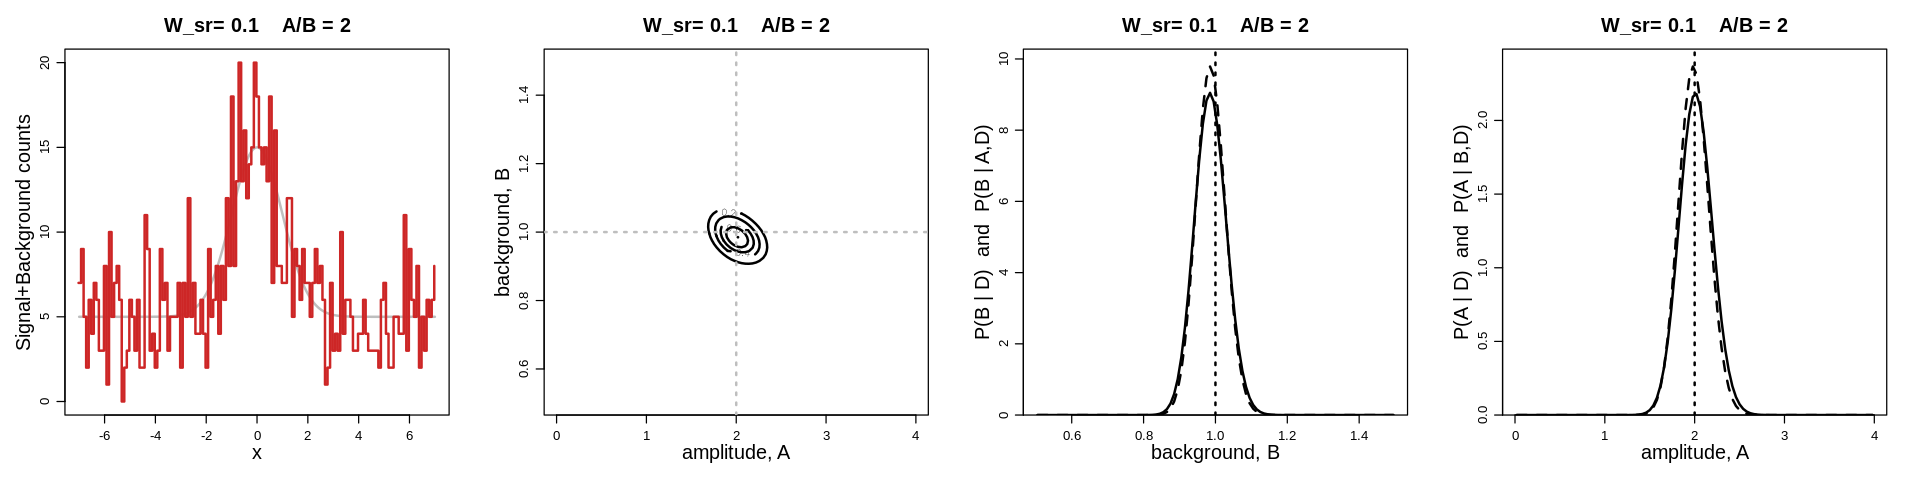

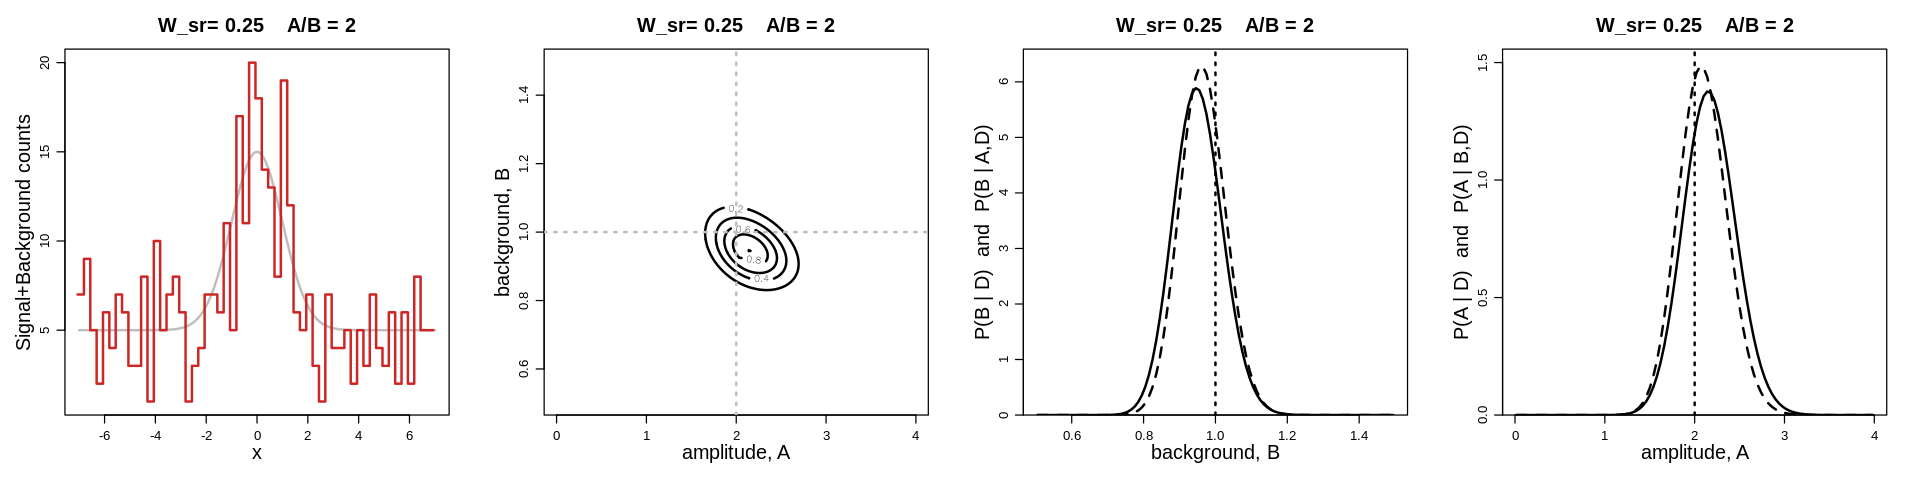

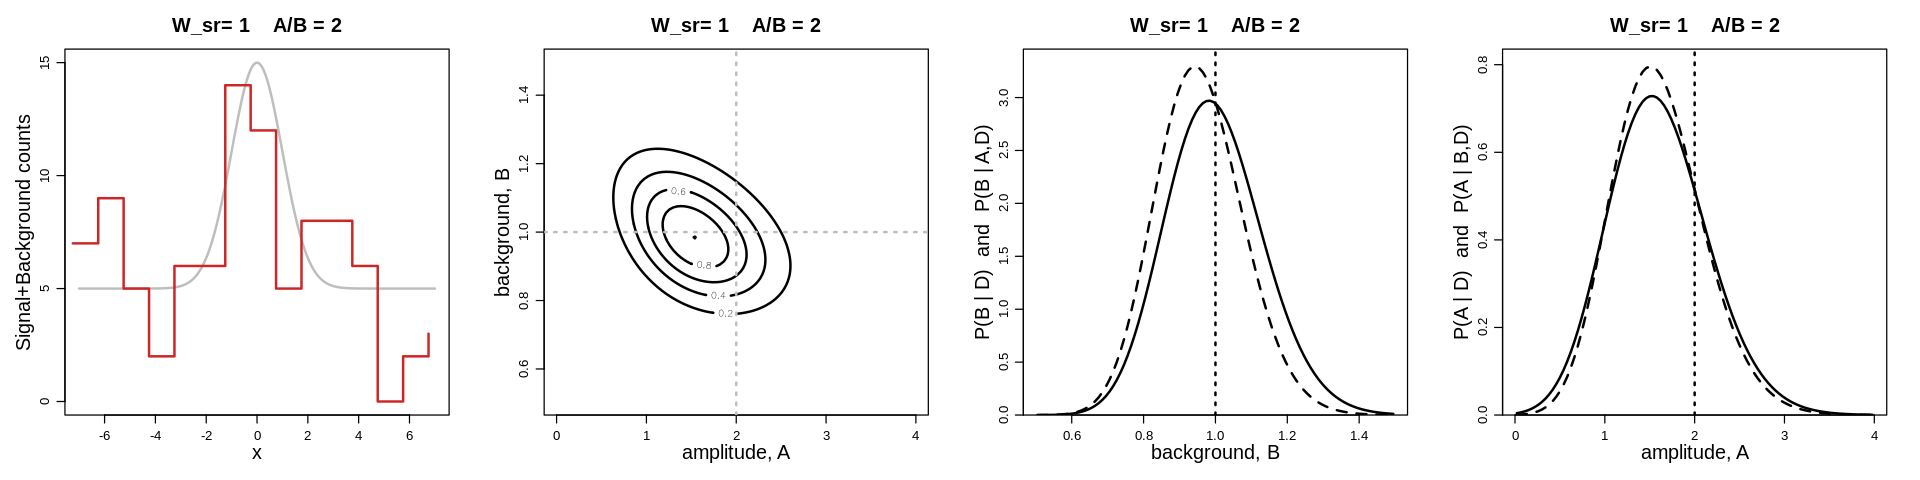

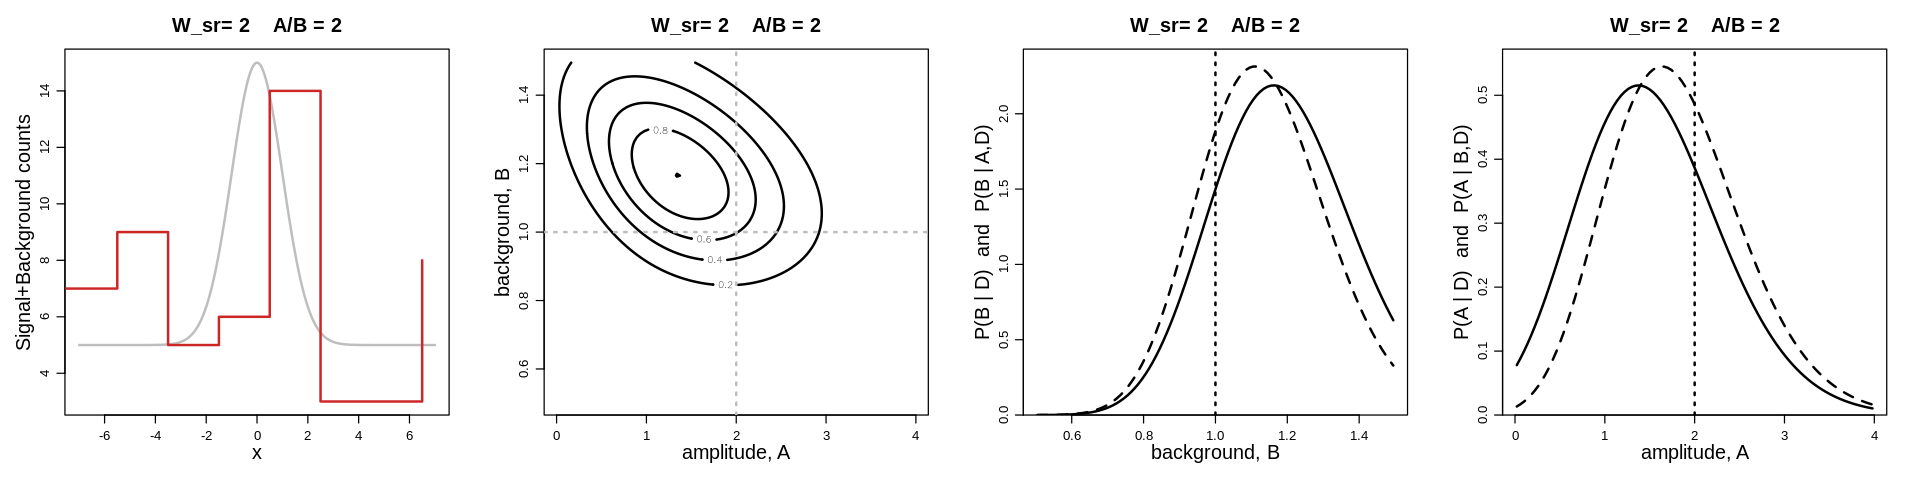

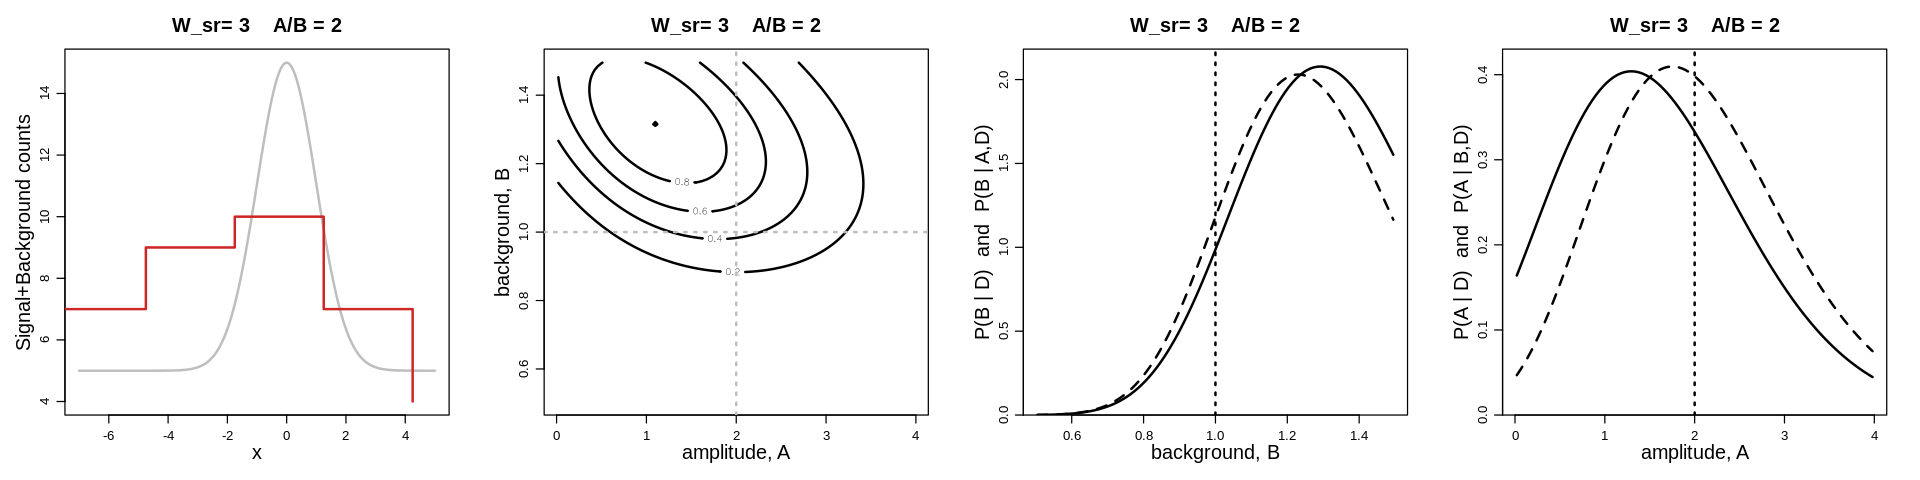

In [86]:
# change the resolution
wl=c(0.1,0.25,1,2,3)
for (w in wl) Analysis(w=w)

#### 2. change the ratio A/B used to simulate the data

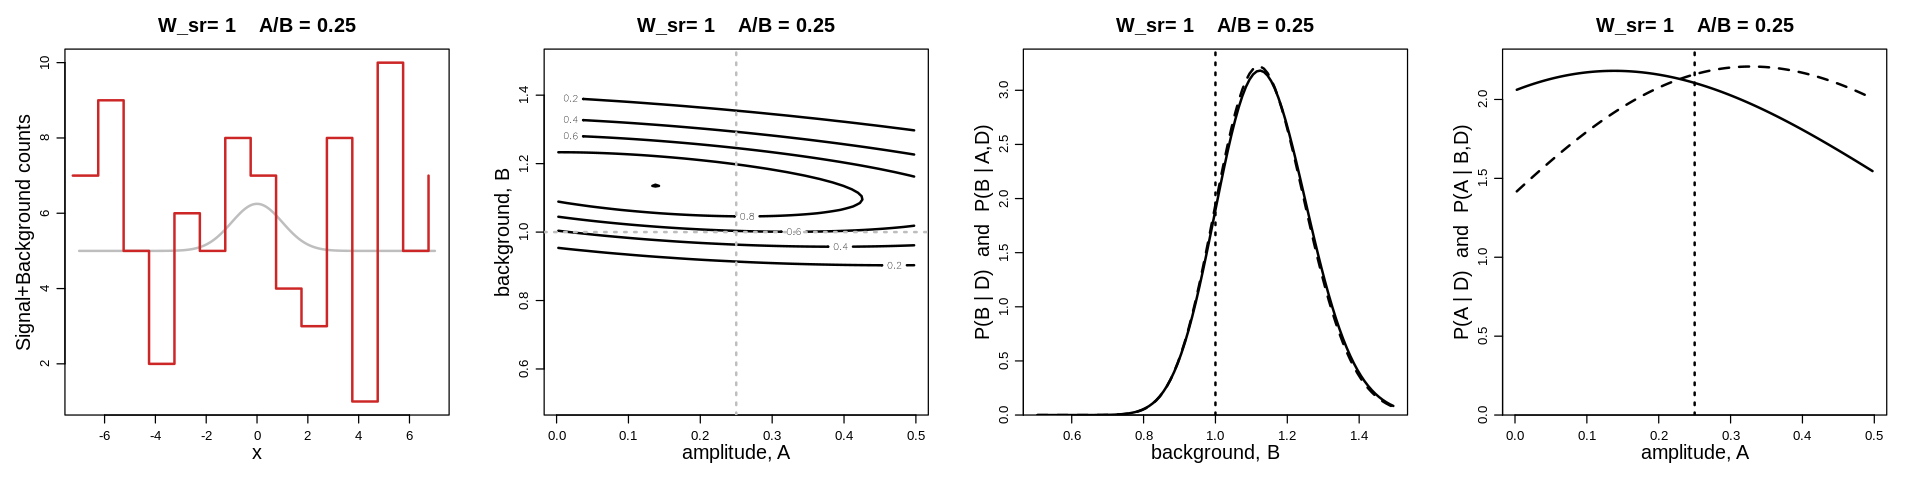

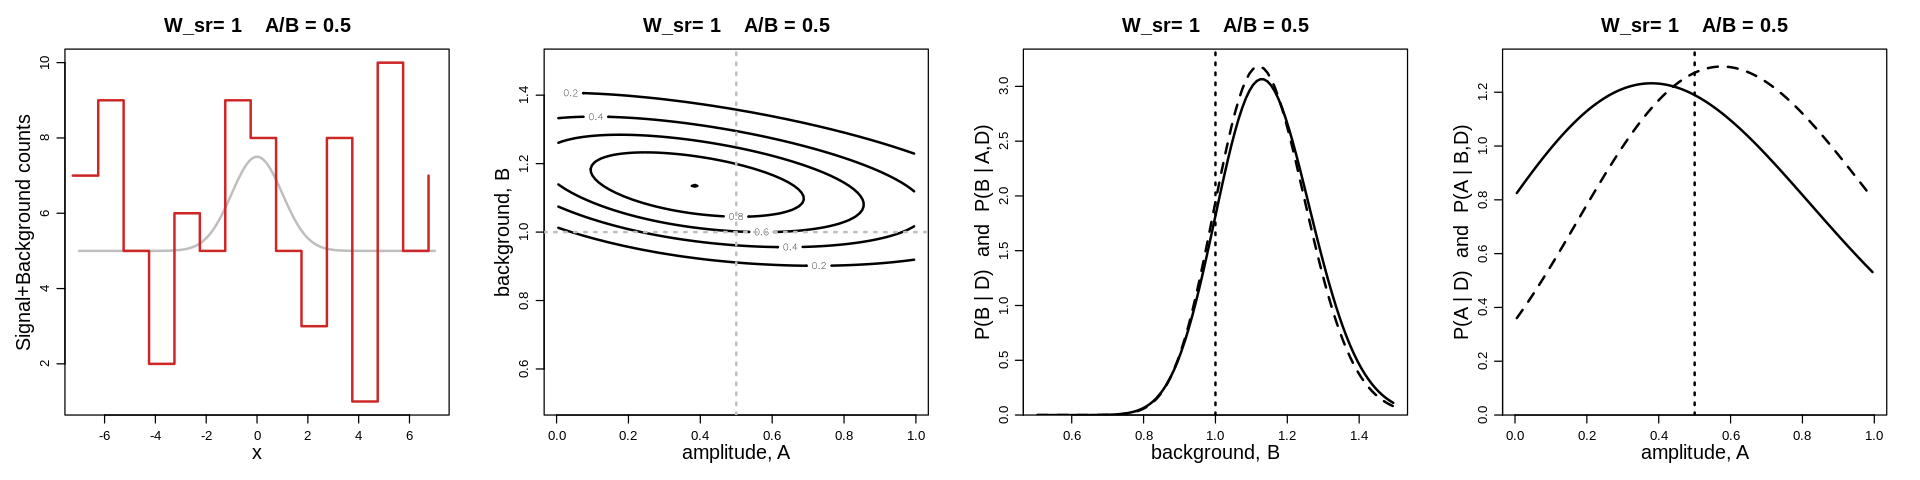

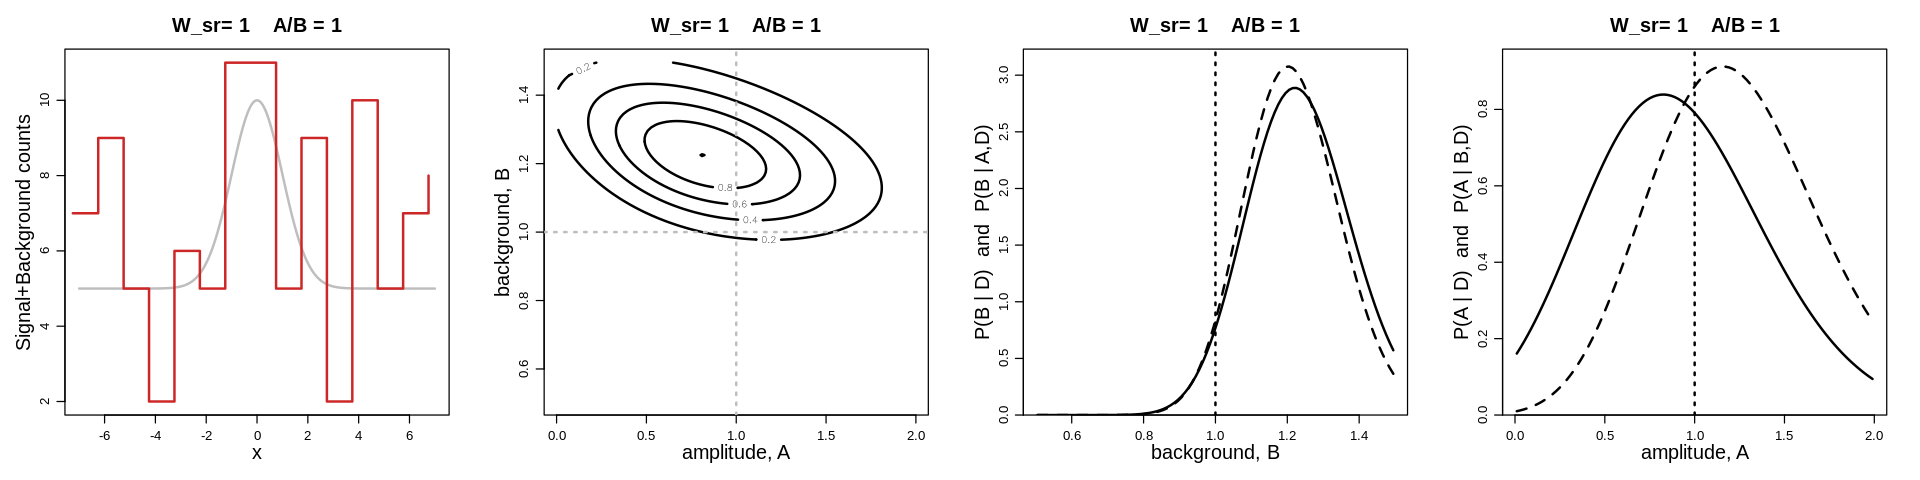

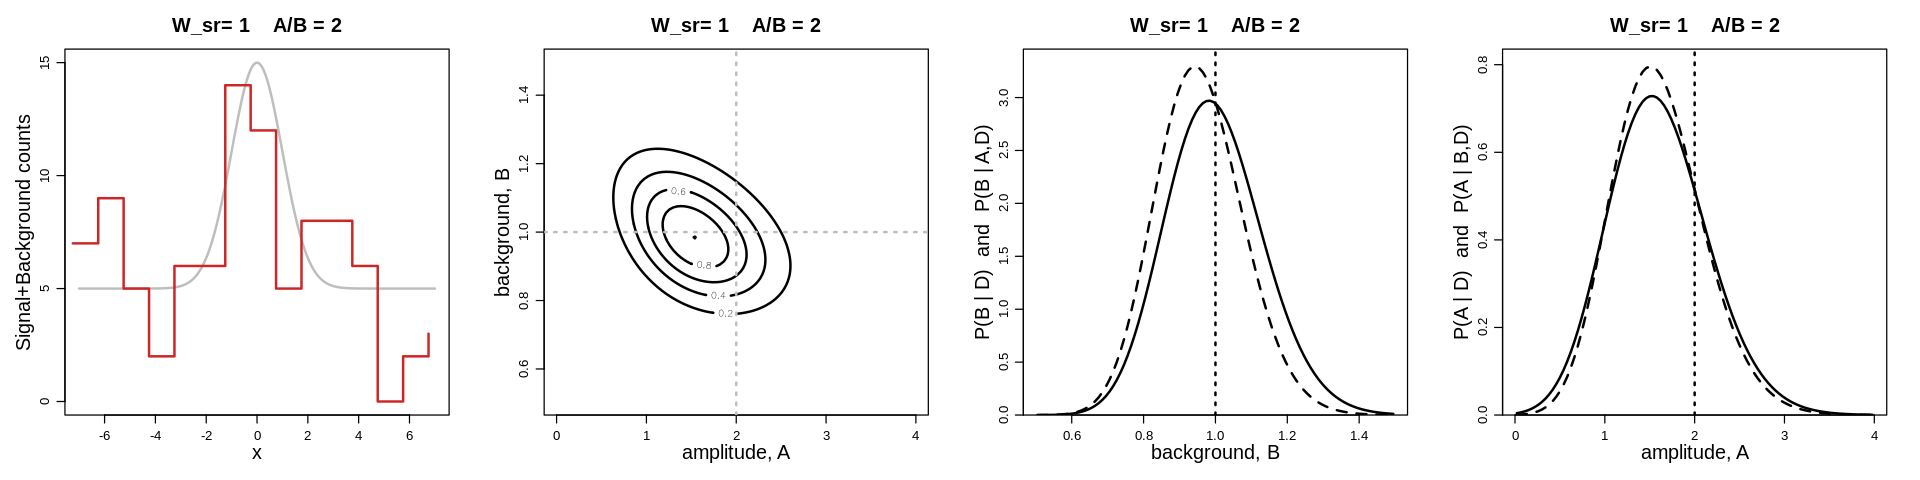

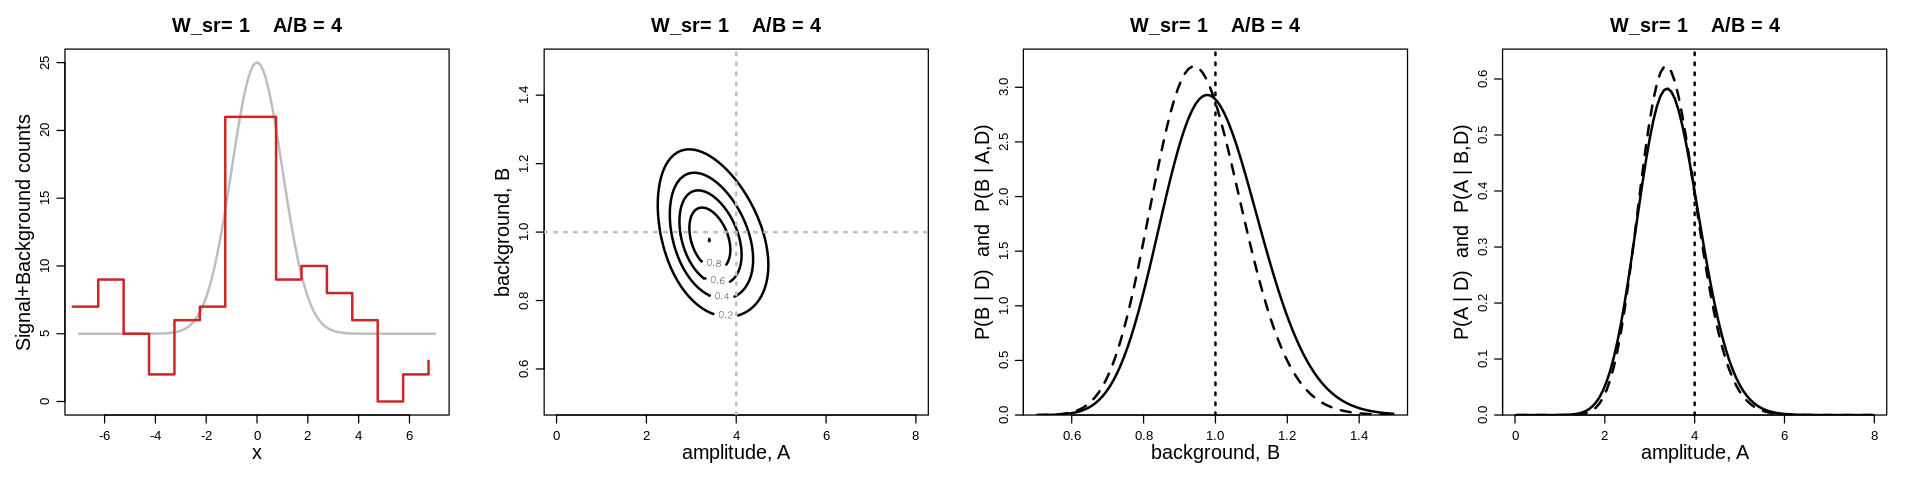

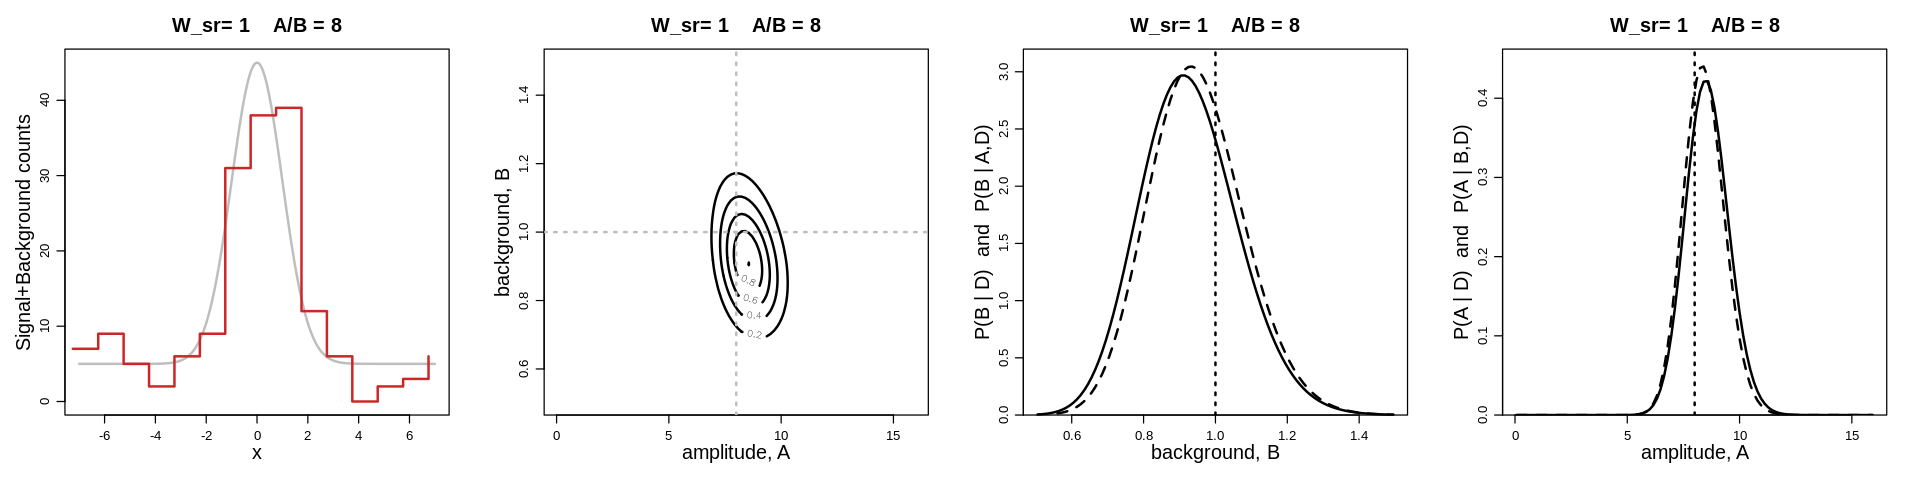

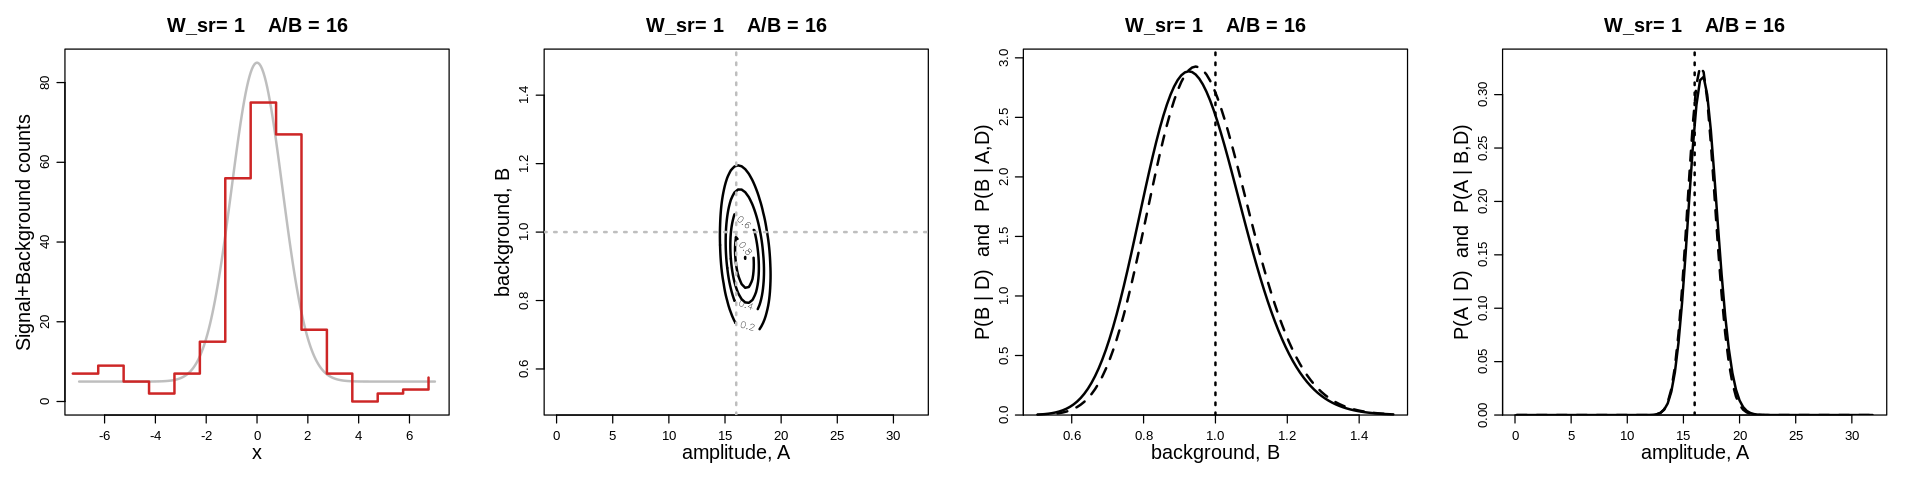

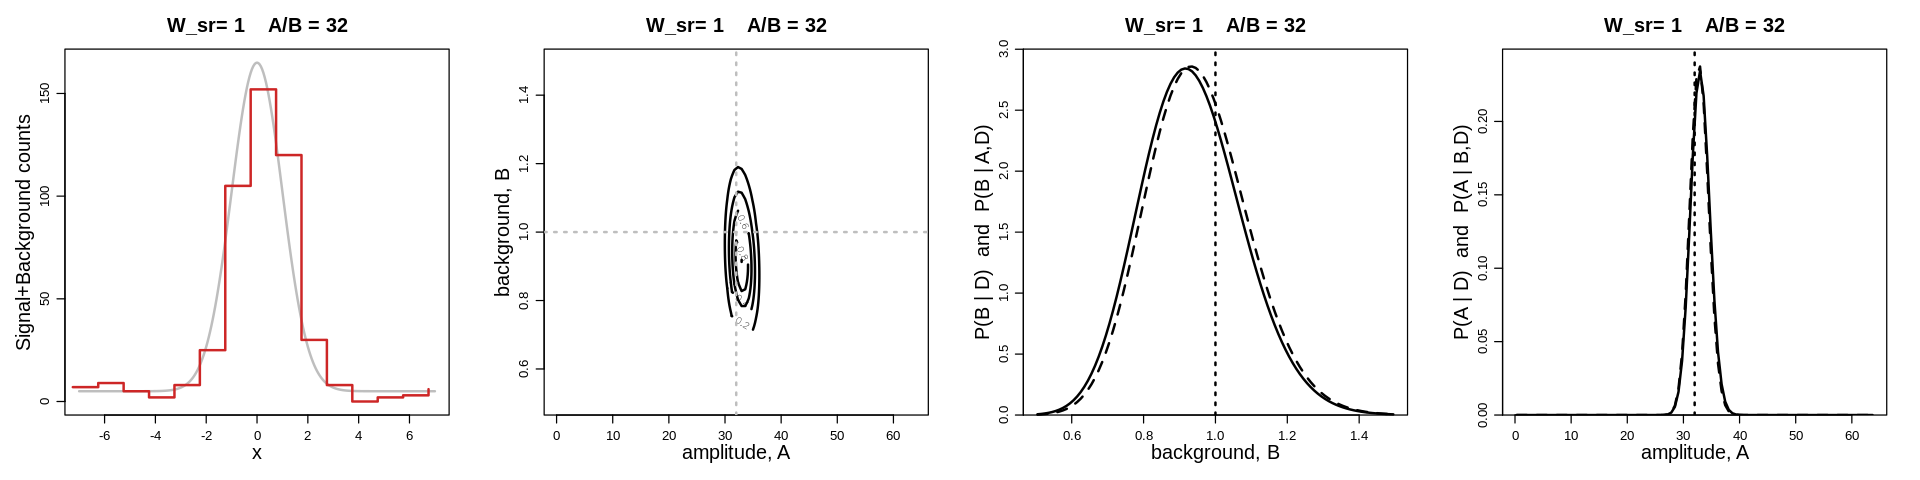

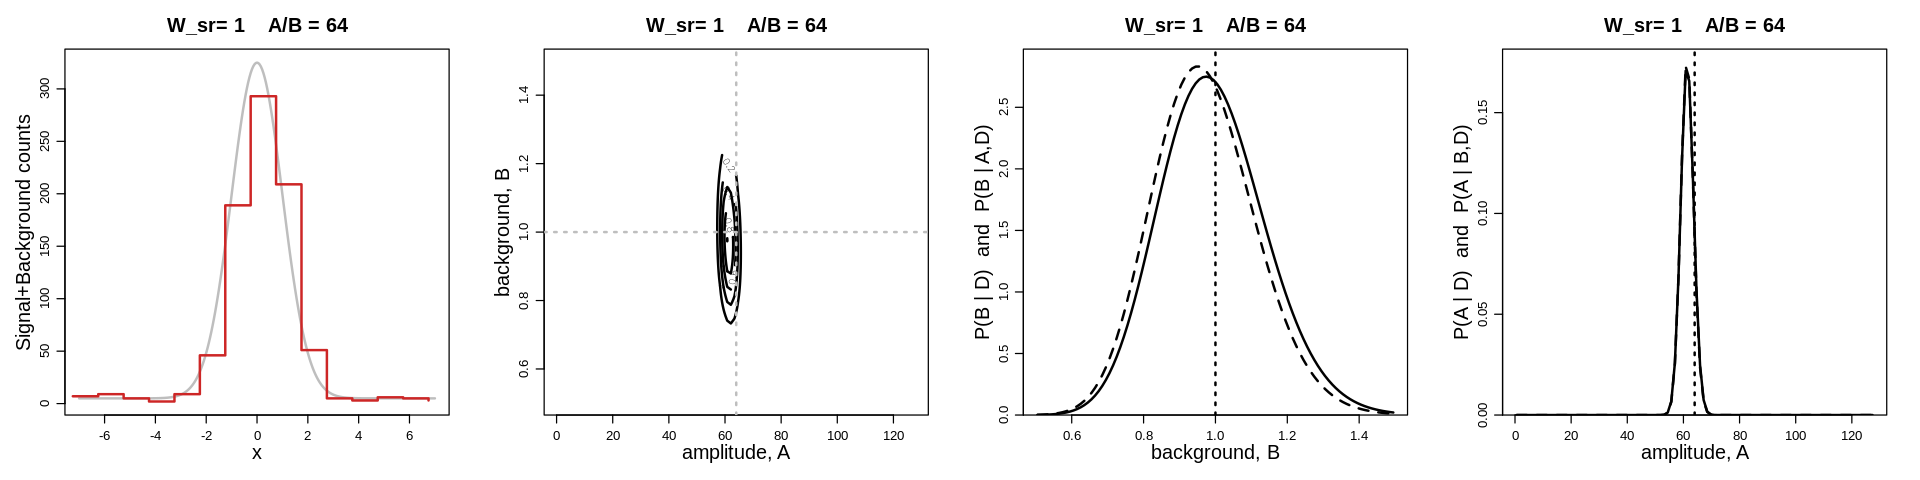

In [87]:
# I change just A
A<- c(0.25,0.5,1,2,4,8,16,32,64)

for (i in A) Analysis(A.true = i)